In [2]:
import pytesseract
from pdf2image import convert_from_path
from PIL import Image
import os
import pandas as pd

In [ ]:
temp1 = convert_from_path("data/unprocessed/debit/2016-11-01_Statement.pdf")[1]
config = "--psm 12" #working numbers 6, 11, 12
print(pytesseract.image_to_string(temp1,config=config))

In [ ]:
temp1 = convert_from_path("data/unprocessed/debit/2017-01-01_Statement.pdf")[1]
config = "--psm 11" #working numbers 6, 11, 12
string_temp = pytesseract.image_to_string(temp1,config=config)
print(string_temp.split("\nDate\n\nDescription\n\nRetraits ($)\n\nDépots ($)\n\nSoldes ($)")[1].split("Total")[0].split("\n\n")[4:])

In [ ]:
temp1

In [ ]:
print(pytesseract.image_to_string(temp1))

In [ ]:
Image.open(temp1)

Attempt 2

In [ ]:
#Turn all pdfs into a jpeg image
print(os.listdir("data/unprocessed/debit"))


In [ ]:
image_test = convert_from_path("data/unprocessed/debit/2016-11-01_Statement.pdf")[1]
image_test.size

In [ ]:
#image_test2 = image_test.crop((325,400,1650,2200))
image_test2 = image_test.crop((325,397,1650,424))
config = "--psm 12 --oem 1"
string_temp = pytesseract.image_to_string(image_test2, config=config)
print(string_temp)

In [ ]:
image_test2

In [ ]:
#image_test2 = image_test.crop((325,400,1650,2200))
image_test3 = image_test.crop((325,430,1650,457))
config = "--psm 7 --oem 1"
string_temp = pytesseract.image_to_string(image_test3, config=config)
print(string_temp)

In [ ]:
image_test3


In [ ]:
image_test4 = image_test.crop((325,463,1650,490))
config = "--psm 7 --oem 1"
string_temp = pytesseract.image_to_string(image_test4, config=config)
print(string_temp)

In [ ]:
image_test4

In [ ]:
image_test5 = image_test.crop((325,490+6,1650,490+6+27))
config = "--psm 12 --oem 1"
string_temp = pytesseract.image_to_string(image_test5, config=config)
string_temp

In [ ]:
image_test5

In [ ]:
string_temp.rstrip("\n")

Testing for cleaning

In [12]:
import pandas as pd
temp = pd.read_csv('data/processed/debit/2021-02-01.csv')
temp_fileter = temp['date'].str.contains(r"[0-3][0-9]\s*[A-Z]{3}")

In [13]:
temp[temp_fileter]

,date,description,charge,total


In [ ]:
import pandas as pd
#testing the concatination of csvs
"data/processed/debit/2016-12-01.csv"
temp1 = pd.read_csv("data/processed/debit/2016-11-01.csv")
temp2 = pd.read_csv("data/processed/debit/2016-12-01.csv")
pd.concat([temp1,temp2])

In [9]:
#create a year column for the data
path = "data/processed/debit/"
os.listdir(path)
#step one turn the months into proper datetime objects
month_to_num = {"JAN" : "01", "FEV" : "02", "MAR" : "03", "AVR" : "04", "MAI" : "05", "JUN" : "06", "JUI" : "07", "AOU" : "08", "SEP" : "09", "OCT" : "10", "NOV" : "11", "DEC" : "12"}


#Lets do our testing here
testing_file = "data/processed/debit/2021-02-01.csv"
file_name = testing_file[-14:-4]
testing_file = pd.read_csv(testing_file)
offset = 0
test = pd.to_datetime(file_name[:4] + testing_file['date'].str[-3:].map(month_to_num) + testing_file['date'].str[:2])
testing_file["date"] = test
if(int(file_name[5:7]) == 1):
    mask = testing_file["date"].dt.month == 12
    testing_file["date"][mask] -= pd.DateOffset(years = 1)
testing_file.to_csv("test.csv",index=False)
testing_file


,date,description,charge,total
0,NaT,MOBILE VIRDT IT/PE,334.50,12817.20
1,NaT,CR. SOLIDARITE GOUV. QUEBEC,161.63,12978.83
2,NaT,TPS CANADA.,112.75,13091.58
3,NaT,C/ACHAT 8421868 AU BON SUSHI,21.16,13070.42
4,NaT,C/ACHAT 8421868 MARCHE J P FONT,46.03,13024.39
5,NaT,ASSURANCE SUN LIFE,18.68,13005.71
6,NaT,ASSURANCE SUN LIFE,48.56,12957.15
7,NaT,C/ACHAT 8421 868 BILLETTERIE LON,19.00,12938.15
8,NaT,COMPTE DIVERS PAYPAL,39.38,12898.77
9,NaT,C/ACHAT 8421868 COUCHE-TARD # 1,13.11,12885.66


In [ ]:
pd.to_datetime(pd.read_csv("test.csv")["date"])

In [2]:
#create a function to change the date column into a datetime series
MONTH_TO_NUM = {"JAN" : "01", "FEV" : "02", "MAR" : "03", "AVR" : "04", "MAI" : "05", "JUN" : "06", "JUI" : "07", "AOU" : "08", "SEP" : "09", "OCT" : "10", "NOV" : "11", "DEC" : "12"}

def create_datetime(df, file_name):
    year= file_name[:4]
    df["date"] = pd.to_datetime(year + df["date"].str[-3:].map(MONTH_TO_NUM) + df["date"].str[:2])
    if(file_name[5:7] == "01"):
        #mask used to 
        mask = df["date"].dt.month == 12
        df["date"][mask] -= pd.DateOffset(years = 1)
    return df

In [ ]:
#create a year column for the data
path = "data/processed/debit/"
files = os.listdir(path)
for file in files:
    print(file)
    temp = create_datetime(pd.read_csv(path + file),file)
    temp.to_csv(path+file, index=False)

: 

In [3]:
pd.read_csv("data\processed\debit/2022-02-01.csv")['total'].replace(r"[^\d]","", regex=True)

0     4406.57
1     4326.10
2     4440.10
3     4603.85
4     4585.17
5     4536.61
6     4854.68
7     5261.23
8     5451.23
9     5535.82
10    5472.88
11    5454.50
12    5642.50
13    5617.92
14    5612.45
15    5584.00
16    3084.00
17    2946.01
18    2841.00
19    1736.39
20    2006.39
21    2276.39
22    2293.39
23    2481.39
24    2605.99
25    2805.99
26    2855.99
27    3605.99
28    2105.99
29    2023.77
30    2051.03
Name: total, dtype: float64

Apply all things from function to backup here

In [4]:
#create a year column for the data
path = "data/processed/debit/"
files = os.listdir(path)
for file in files:
    df = pd.read_csv(path + file)

    #change the format of total and charge so we can use it without error later
    df["total"] = df["total"].replace(r"[^\d]", "", regex=True)
    df["charge"] = df["charge"].replace(r"[^\d]", "", regex=True)
    #turn it into a decimal
    df["total"] = df["total"].str[:-2] + "." + df["total"].str[-2:]
    df["charge"] = df["charge"].str[:-2] + "." + df["charge"].str[-2:]
    df.to_csv(path + file, index=False)

In [54]:
import re
error = "OOOO02o JAN"
pattern = r"[^\s*[A-Z]{3}]"
pattern = r"^\D+[^[0-3][0-9]]"
re.sub(pattern, "", error)

'OOOO02o JAN'

In [78]:
import pandas as pd
#here we will do some catagorizing of the descriptions on the data and create a make shift catagorizer
test = pd.read_csv("expenses.csv").dropna()
test.pop("total")
test["catagory"] = pd.NA
bills = [
    "frais",
    "fr tenue",
    "interets decouvert",
    "ASSURANCE SUN LIFE",
    "TRANS. EXCEDENT."
]
mobile_payments = [
    "mobile",
    "internet paiem"
]
transport = [
    "billetterie lon",
    "billeterie du",
    "stm",
    "BILLETTERIE TER"
]
resturants = [
    "la belle provin",
    "mcdonald",
    "krispy kreme",
    "tim horton",
    "tims hortons",
    "cafe gar",
    "subway",
    "cantine",
    "restaurants",
    "dairy queen",
    "dunns",
    "eggsquis",
    "thai express",
    "pizzahut",
    "n g drive in",
    "pizza pizza",
    "amir",
    "frite alors",
    "au bon sushi",
    "ROTISSERIE",
    "boustan",
    "TUTTI FRUTTI",
    "benny bbq",
    "nos thes",
    "wendys",
    "thai expr",
    "buffet",
    "EAST SIDE MARIO",
    "kalbi",
    "a&w",
    "DISTILLERIE",
    "KINTON RAMEN",
    "resto",
    "harvey",
    "cafe",
    "LA DIPERIE"
]
groceries = [
    "maxi",
    "super c",
    "iga extra",
    "depanneur",
    "provigo",
    "ALIMENTS KIM PH",
    "FRUITERIE 440",
    "metro"
]
gas_station = [
    "petro-canada",
    "couche-tard",
    "couchetard",
    "ULTRAMAR"
]
withdraws = [
    "retrait"
]
food = [
    "LE TERROIR DE D"
]
office_ware = [
    "bureau en gros",
    "BKSTR CHAMPLAIN"
]
hard_ware = [
    "home depot",
    "canadian tire"
]
home_ware = [
    "economax"
]
electronics = [
    "best buy",
    "canada computer",
    "eb games",
    "superclub video"
]
retail = [
    "wal-mart",
    "tigre geant",
    "dollarama",
    "animal expert",
    "party expert",
    "tristan",
    "marche",
    "IMAGINUS CANADA", # posters
    "jeans factory",
    "game keeper", #board game store,
    "aldo",
    "yellow",
    "AUBAINERIE",
    "CLAIR DE LUNE",
    "lush",
    "giant tiger",
    "bongia",
    "sephora",
    "FERNANDE FLEURI",
    "SQDC",
    "SAQ",
    "ardene",
    "MEGA VENTE",
    "LA VIE EN ROSE",
    "h&m"
]
medical = [
    "pharmaprix",
    "jean coutu",
    "CLIN VISUELLE",
    "pharm"
]
paypal = [
    "paypal"
]
interact_transfers = [ 
    "interac"
]
investments = [ 
    "invest"
]
activity = [ 
    "BREAKOUT",
    "DOMAINE DU SKI",
    "MOUNTAIN EQUIPM"
]
cheque = [
    "cheque"
]
#mask creations
test.loc[test["description"].str.contains("|".join(bills), case=False), "catagory"] = "bills" # bills
test.loc[test["description"].str.contains("|".join(mobile_payments), case=False),'catagory'] = "mobile_payments" #bills
test.loc[test["description"].str.contains("|".join(transport), case=False),'catagory'] = "transport" #bills
test.loc[test["description"].str.contains("|".join(resturants), case=False),'catagory'] = "resturants" #food
test.loc[test["description"].str.contains("|".join(groceries), case=False),'catagory'] = "groceries" #food
test.loc[test["description"].str.contains("|".join(gas_station), case=False),'catagory'] = "gas_station" #bills/leisure
test.loc[test["description"].str.contains("|".join(withdraws), case=False),'catagory'] = "withdraws" #other
test.loc[test["description"].str.contains("|".join(food), case=False),'catagory'] = "food" # food/retail
test.loc[test["description"].str.contains("|".join(office_ware), case=False),'catagory'] = "office_ware" #retail
test.loc[test["description"].str.contains("|".join(hard_ware), case=False),'catagory'] = "hard_ware" #retail
test.loc[test["description"].str.contains("|".join(home_ware), case=False),'catagory'] = "home_ware" #retail
test.loc[test["description"].str.contains("|".join(electronics), case=False),'catagory'] = "electronics" #retail
test.loc[test["description"].str.contains("|".join(retail), case=False),'catagory'] = "retail" #retail
test.loc[test["description"].str.contains("|".join(medical), case=False),'catagory'] = "medical" #bills
test.loc[test["description"].str.contains("|".join(paypal), case=False),'catagory'] = "paypal" #paypal
test.loc[test["description"].str.contains("|".join(interact_transfers), case=False),'catagory'] = "interact" #interact
test.loc[test["description"].str.contains("|".join(investments), case=False),'catagory'] = "investment" #investment
test.loc[test["description"].str.contains("|".join(activity), case=False),'catagory'] = "activity" #luxury
test.loc[test["description"].str.contains("|".join(cheque), case=False),'catagory'] = "cheque" #cheques
test.loc[test.catagory.isna(), 'catagory'] = "other" #for uncatagorized

#make two cats [nec and lux]

In [76]:
#test[test["description"].str.contains('LE BISTROM', case=False)]
test

,date,description,charge,catagory
0,2016-11-01,FRAIS FIXES,0.44,bills
1,2016-12-01,FR TENUE DE CPTE,2.50,bills
2,2016-12-01,FRAIS FIXES,2.75,bills
3,2016-12-01,INTERETS DECOUVERT,0.05,bills
4,2016-12-30,FRAIS FIXES,2.75,bills
...,...,...,...,...
1145,2022-03-18,COMPTE DIVERS PAYPAL,24.58,paypal
1146,2022-03-22,VIREMENT INTERAC,96.14,interact
1147,2022-03-28,MOBILE VIREMENTMC,728.92,mobile_payments
1148,2022-03-29,COMPTE DIVERS PAYPAL,44.43,paypal


In [96]:
"|".join(mobile_payments)

'mobile'

In [79]:
#for the sake of a prototpye we will only keep three catagories: bills, food, travel, third_party, retail, other
bills_cat = ["bills", "mobile_payments", "medical"]
food_cat = ["resturants", "groceries", "food"]
travel_cat = ["transport", "gas_station"]
third_cat = ["paypal", "interact"]
retail_cat = ["retail", "hard_ware", "home_ware", "electronics"]
sum_list = ["bills", "food", "travel", "third_party", "retail"]
test.loc[test.catagory.isin(bills_cat), "catagory"] = "bills"
test.loc[test.catagory.isin(food_cat), "catagory"] = "food"
test.loc[test.catagory.isin(travel_cat), "catagory"] = "travel"
test.loc[test.catagory.isin(third_cat), "catagory"] = "third_party"
test.loc[test.catagory.isin(retail_cat), "catagory"] = "retail"
test.loc[~test.catagory.isin(sum_list), "catagory"] = "other"
test.catagory.unique()


array(['bills', 'travel', 'food', 'other', 'retail', 'third_party'],
      dtype=object)

In [89]:
test.date = test.date.astype("datetime64")

In [92]:
test = test.set_index("date")

In [109]:
test.index = test.index.strftime("%Y-%m")

In [115]:
test.pop("description")

date
2016-11             FRAIS FIXES
2016-12        FR TENUE DE CPTE
2016-12             FRAIS FIXES
2016-12      INTERETS DECOUVERT
2016-12             FRAIS FIXES
                   ...         
2022-03    COMPTE DIVERS PAYPAL
2022-03        VIREMENT INTERAC
2022-03       MOBILE VIREMENTMC
2022-03    COMPTE DIVERS PAYPAL
2022-04        VIREMENT INTERAC
Name: description, Length: 1149, dtype: object

In [144]:
total_per_catagory = test.groupby(["date", "catagory"]).sum().reset_index().set_index('date')
total = total_per_catagory.groupby("date").sum()
total.columns = ["total"]

,total
date,
2016-11,0.44
2016-12,8.06
2017-02,456.62
2017-03,600.55
2017-04,318.70
...,...
2021-12,1433.64
2022-01,5717.36
2022-02,352.43


In [155]:
payments = pd.merge(total_per_catagory, total, on="date", how="left")
payments["percentage"] = payments.charge/payments.total
payments = payments.drop(["charge", "total"], axis = 1)

In [159]:
#fill in empty dates
date_df = pd.DataFrame(payments.index.unique(), columns=["date"])
date_df
catagory_df = pd.DataFrame(payments.catagory.unique(), columns = ["catagory"])
final_df = date_df.merge(catagory_df, how = "cross").merge(payments, how = "left", on = ["date", "catagory"]).fillna(0.0)

In [164]:
final_df.date = final_df.date.astype("datetime64")
final_df.set_index("date", inplace=True)


In [165]:
final_df

,catagory,percentage
date,,
2016-11-01,bills,1.0
2016-11-01,food,0.0
2016-11-01,travel,0.0
2016-11-01,other,0.0
2016-11-01,retail,0.0
...,...,...
2022-04-01,food,0.0
2022-04-01,travel,0.0
2022-04-01,other,0.0


In [251]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

#ARIMA TIME!!!
training_data = final_df.loc[final_df.catagory == "bills", "percentage"]["2017":]
model = ARIMA(training_data, order=(6,1,4)).fit()

e:\school\env_3.9.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
e:\school\env_3.9.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
e:\school\env_3.9.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
e:\school\env_3.9.9\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\school\env_3.9.9\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertib

<AxesSubplot:>

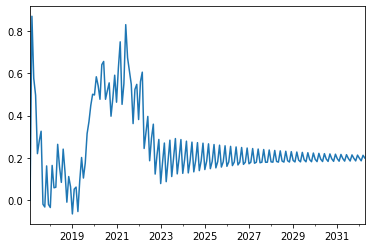

In [252]:

model.predict(training_data.index.min(), (final_df.index.max() + pd.offsets.DateOffset(years=10))).plot()

In [209]:
final_df.index.max() + pd.offsets.DateOffset(years=10)

Timestamp('2032-04-01 00:00:00')

e:\school\env_3.9.9\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


NameError: name 'plt' is not defined

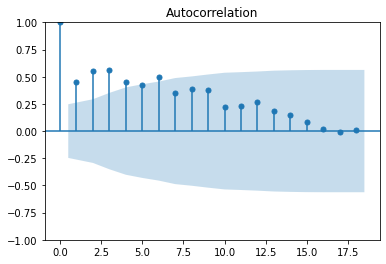

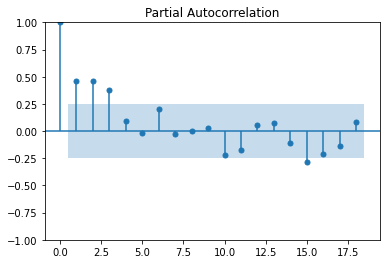

In [248]:
plot_acf(training_data)
plot_pacf(training_data)
plt.show()